In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns ## For histogram and other plots
import sys
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
# #interl
# from sklearnex import patch_sklearn
# patch_sklearn()

C:\Users\20151\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#import data
path = r"C:\Users\20151\OneDrive - EDHEC\EDHEC\Thesis\Python Codes\Data"
data = pd.read_csv(path + r"\UCI_Credit_Card.csv") 
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data2 = data.copy()

In [92]:
#change column names
new_names = {'default.payment.next.month': 'DEF_PAY_10', 
                  'PAY_0': 'PAY_09',
                   'PAY_2':'PAY_08',
                   'PAY_3':'PAY_07',
                   'PAY_4':'PAY_06',
                   'PAY_5':'PAY_05',
                   'PAY_6':'PAY_04',
                   'BILL_AMT1':'BILL_AMT_09',
                   'BILL_AMT2':'BILL_AMT_08',
                   'BILL_AMT3':'BILL_AMT_07',
                   'BILL_AMT4':'BILL_AMT_06',
                   'BILL_AMT5':'BILL_AMT_05',
                   'BILL_AMT6':'BILL_AMT_04',
                   'PAY_AMT1':'PAY_AMT_09',
                   'PAY_AMT2':'PAY_AMT_08',
                   'PAY_AMT3':'PAY_AMT_07',
                   'PAY_AMT4':'PAY_AMT_06',
                   'PAY_AMT5':'PAY_AMT_05',
                   'PAY_AMT6':'PAY_AMT_04'
                   }

data2 = data.rename(columns= new_names)

data2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [98]:
excel_file_path = 'combined_series.xlsx'
df_ordered = data2[['LIMIT_BAL','PAY_AMT_04','PAY_AMT_05','PAY_AMT_06','PAY_AMT_07','PAY_AMT_08','PAY_AMT_09',
                     'BILL_AMT_04','BILL_AMT_05','BILL_AMT_06','BILL_AMT_07','BILL_AMT_08','BILL_AMT_09']]

df_ordered.to_excel(excel_file_path, index=False)

In [7]:
columns_to_scale = ['LIMIT_BAL','AGE','BILL_AMT_09','BILL_AMT_08','BILL_AMT_07','BILL_AMT_06','BILL_AMT_05','BILL_AMT_04',
                   'PAY_AMT_09','PAY_AMT_08','PAY_AMT_07','PAY_AMT_06','PAY_AMT_05','PAY_AMT_04']

scaler = StandardScaler()

data2[columns_to_scale] = scaler.fit_transform(data2[columns_to_scale])


data2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0.404759,1,3,1,0.381275,0,0,0,0,0,0,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,29997,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,0,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,29998,-1.059646,1,2,2,0.164303,4,3,2,-1,0,0,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,29999,-0.674276,1,3,1,0.598248,1,-1,0,0,0,-1,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


In [8]:
# data = data.rename(columns={'default.payment.next.month': 'def_pay'})
# data.head()

In [9]:
data2.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,15000.500000,-6.063298e-17,1.603733,1.853133,1.551867,-1.856885e-16,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,-1.231607e-17,-3.789561e-17,6.252776e-17,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17,0.221200
std,8660.398374,1.000017e+00,0.489129,0.790349,0.521970,1.000017e+00,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415062
min,1.000000,-1.213794e+00,1.000000,0.000000,0.000000,-1.571479e+00,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.944312e+00,-1.671375e+00,-2.945672e+00,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,0.000000
25%,7500.750000,-9.054983e-01,1.000000,1.000000,1.000000,-8.120745e-01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-6.473120e-01,-6.490466e-01,-6.394814e-01,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,0.000000
50%,15000.500000,-2.118326e-01,2.000000,2.000000,2.000000,-1.611565e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.916884e-01,-3.931159e-01,-3.882529e-01,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,0.000000
75%,22500.250000,5.589071e-01,2.000000,2.000000,2.000000,5.982479e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.154919e-01,2.083271e-01,1.896457e-01,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,0.000000
max,30000.000000,6.416528e+00,2.000000,6.000000,3.000000,4.720729e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.240296e+01,1.313360e+01,2.331820e+01,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.000000


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  float64
 6   PAY_09       30000 non-null  int64  
 7   PAY_08       30000 non-null  int64  
 8   PAY_07       30000 non-null  int64  
 9   PAY_06       30000 non-null  int64  
 10  PAY_05       30000 non-null  int64  
 11  PAY_04       30000 non-null  int64  
 12  BILL_AMT_09  30000 non-null  float64
 13  BILL_AMT_08  30000 non-null  float64
 14  BILL_AMT_07  30000 non-null  float64
 15  BILL_AMT_06  30000 non-null  float64
 16  BILL_AMT_05  30000 non-null  float64
 17  BILL_AMT_04  30000 non-null  float64
 18  PAY_AMT_09   30000 non-null  float64
 19  PAY_

In [11]:
#categorical variables
data2[['SEX', 'EDUCATION', 'MARRIAGE']].describe().round(2)

,SEX,EDUCATION,MARRIAGE
count,30000.00,30000.00,30000.00
mean,1.60,1.85,1.55
std,0.49,0.79,0.52
min,1.00,0.00,0.00
25%,1.00,1.00,1.00
50%,2.00,2.00,2.00
75%,2.00,2.00,2.00
max,2.00,6.00,3.00


In [12]:
# Payment delay description
data2[['PAY_04','PAY_05','PAY_06','PAY_07','PAY_08','PAY_09']].describe().round(2)

,PAY_04,PAY_05,PAY_06,PAY_07,PAY_08,PAY_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.29,-0.27,-0.22,-0.17,-0.13,-0.02
std,1.15,1.13,1.17,1.20,1.20,1.12
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [13]:
# Bill Statement description
data2[['BILL_AMT_04','BILL_AMT_05','BILL_AMT_06','BILL_AMT_07','BILL_AMT_08','BILL_AMT_09']].describe().round(2)

,BILL_AMT_04,BILL_AMT_05,BILL_AMT_06,BILL_AMT_07,BILL_AMT_08,BILL_AMT_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-6.36,-2.00,-3.32,-2.95,-1.67,-2.94
25%,-0.63,-0.63,-0.64,-0.64,-0.65,-0.65
50%,-0.37,-0.37,-0.38,-0.39,-0.39,-0.39
75%,0.17,0.16,0.17,0.19,0.21,0.22
max,15.50,14.59,13.19,23.32,13.13,12.40


In [14]:
#Previous Payment Description
data2[['PAY_AMT_04','PAY_AMT_05','PAY_AMT_06','PAY_AMT_07','PAY_AMT_08','PAY_AMT_09']].describe().round(2)

,PAY_AMT_04,PAY_AMT_05,PAY_AMT_06,PAY_AMT_07,PAY_AMT_08,PAY_AMT_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.29,-0.31,-0.31,-0.30,-0.26,-0.34
25%,-0.29,-0.30,-0.29,-0.27,-0.22,-0.28
50%,-0.21,-0.22,-0.21,-0.19,-0.17,-0.22
75%,-0.07,-0.05,-0.05,-0.04,-0.04,-0.04
max,29.45,27.60,39.33,50.60,72.84,52.40


In [15]:
data2.LIMIT_BAL.describe()

count    3.000000e+04
mean    -6.063298e-17
std      1.000017e+00
min     -1.213794e+00
25%     -9.054983e-01
50%     -2.118326e-01
75%      5.589071e-01
max      6.416528e+00
Name: LIMIT_BAL, dtype: float64

In [16]:
#1:male and 2:female
freq_column1 = data2['SEX'].value_counts()
category_percentage = data2['SEX'].value_counts(normalize=True)*100
mean_sex = data2.groupby('SEX')['DEF_PAY_10'].mean()
print(freq_column1)
print(category_percentage)
print(mean_sex)

SEX
2    18112
1    11888
Name: count, dtype: int64
SEX
2    60.373333
1    39.626667
Name: proportion, dtype: float64
SEX
1    0.241672
2    0.207763
Name: DEF_PAY_10, dtype: float64


In [17]:
#table of requencies for SEX
result_table = data2.groupby('SEX').agg({
    'DEF_PAY_10': ['count', lambda x: (x == 1).sum(), lambda x: (x == 0).sum(), 'mean']
})
result_table.columns = ['n', 'defaulters', 'no defaulters', 'mean']

print(result_table)

         n  defaulters  no defaulters      mean
SEX                                            
1    11888        2873           9015  0.241672
2    18112        3763          14349  0.207763


In [18]:
#2:university , 1:graduate school , 3:high school, 4,5,6,0:unknownn
freq_column1 = data2['EDUCATION'].value_counts()
category_percentage = data2['EDUCATION'].value_counts(normalize=True)*100

print(freq_column1)
print(category_percentage)

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
EDUCATION
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: proportion, dtype: float64


In [19]:
#table of requencies for EDUCATION
result_table = data2.groupby('EDUCATION').agg({
    'DEF_PAY_10': ['count', lambda x: (x == 1).sum(), lambda x: (x == 0).sum(), 'mean']
})
result_table.columns = ['n', 'defaulters', 'no defaulters', 'mean']

print(result_table)

               n  defaulters  no defaulters      mean
EDUCATION                                            
0             14           0             14  0.000000
1          10585        2036           8549  0.192348
2          14030        3330          10700  0.237349
3           4917        1237           3680  0.251576
4            123           7            116  0.056911
5            280          18            262  0.064286
6             51           8             43  0.156863


In [20]:
#2:single , 1:married, 3,0: others
freq_column1 = data2['MARRIAGE'].value_counts()
category_percentage = data2['MARRIAGE'].value_counts(normalize=True)*100

print(freq_column1)
print(category_percentage)

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
MARRIAGE
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: proportion, dtype: float64


C:\Users\20151\AppData\Local\Temp\ipykernel_30264\2983226152.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = data3.groupby('Age Group')['DEF_PAY_10'].mean()


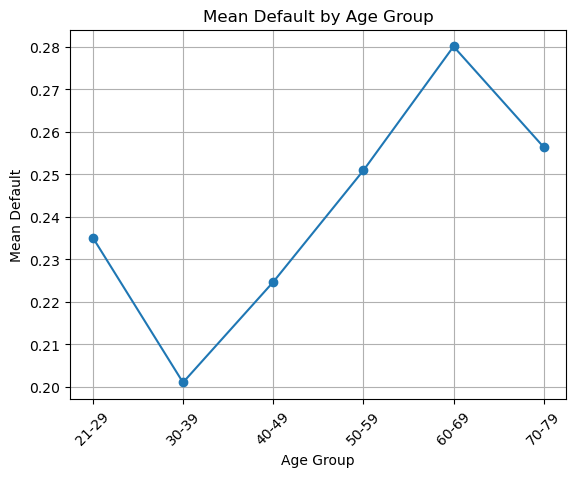

In [21]:
age_bins = [21, 29,39,49,59,69,79]
age_labels = ['21-29', '30-39','40-49','50-59','60-69','70-79']


data3 = data2.copy()
# # Create 'Age Range' column using pd.cut
data3['Age Group'] =pd.cut(data['AGE'], bins=age_bins, labels=age_labels, right=False)
grouped_df = data3.groupby('Age Group')['DEF_PAY_10'].mean()

# Plot the line graph
plt.plot(grouped_df.index, grouped_df.values, marker='o')
plt.title('Mean Default by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Default')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  float64
 6   PAY_09       30000 non-null  int64  
 7   PAY_08       30000 non-null  int64  
 8   PAY_07       30000 non-null  int64  
 9   PAY_06       30000 non-null  int64  
 10  PAY_05       30000 non-null  int64  
 11  PAY_04       30000 non-null  int64  
 12  BILL_AMT_09  30000 non-null  float64
 13  BILL_AMT_08  30000 non-null  float64
 14  BILL_AMT_07  30000 non-null  float64
 15  BILL_AMT_06  30000 non-null  float64
 16  BILL_AMT_05  30000 non-null  float64
 17  BILL_AMT_04  30000 non-null  float64
 18  PAY_AMT_09   30000 non-null  float64
 19  PAY_

In [23]:
data2[['PAY_04', 'PAY_05', 'PAY_06', 'PAY_07', 'PAY_08', 'PAY_09']].describe().round(2)

,PAY_04,PAY_05,PAY_06,PAY_07,PAY_08,PAY_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.29,-0.27,-0.22,-0.17,-0.13,-0.02
std,1.15,1.13,1.17,1.20,1.20,1.12
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [24]:
data2[['DEF_PAY_10']].describe()

,DEF_PAY_10
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [25]:
#CHANGING SEX COLUMN
sex_dummies = pd.get_dummies(data['SEX'])
sex_dummies = sex_dummies.rename(columns={1:'Sex_M',2:'Sex_F'})
sex_dummies = sex_dummies.astype(int)
sex_dummies

,Sex_M,Sex_F
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
29995,1,0
29996,1,0
29997,1,0
29998,1,0


In [26]:
#agrupar the 0's and 3's into one category
grouped_counts = data.groupby('MARRIAGE').size().reset_index(name='Count')
grouped_counts

,MARRIAGE,Count
0,0,54
1,1,13659
2,2,15964
3,3,323


In [27]:
np.where((data2['MARRIAGE']==0) | (data2['MARRIAGE']==3),3,data2['MARRIAGE'])

array([1, 2, 2, ..., 2, 1, 1], dtype=int64)

In [28]:
#CHANGING MARRIAGE COLUMN
#0,3: others
#1: married
#2: single
marriage_cleaned = np.where((data2['MARRIAGE']==0) | (data2['MARRIAGE']==3),3,data2['MARRIAGE'])

status = pd.get_dummies(marriage_cleaned,prefix='Marriage')
status  = status.astype(int)
status


#Marriage_1: married
#Marriage_2: single
#Marriage_3: others

,Marriage_1,Marriage_2,Marriage_3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
29995,1,0,0
29996,0,1,0
29997,0,1,0
29998,1,0,0


In [29]:
marriage_cleaned

array([1, 2, 2, ..., 2, 1, 1], dtype=int64)

In [30]:
marriage_cleaned

array([1, 2, 2, ..., 2, 1, 1], dtype=int64)

In [31]:
data2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0.404759,1,3,1,0.381275,0,0,0,0,0,0,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,29997,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,0,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,29998,-1.059646,1,2,2,0.164303,4,3,2,-1,0,0,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,29999,-0.674276,1,3,1,0.598248,1,-1,0,0,0,-1,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


In [32]:
# data2 = pd.concat([data, status], axis=1)

In [33]:
#CHANGE EDUCATION COLUMN

In [34]:
data['EDUCATION'].unique()


array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [35]:
#0,4,5,6: Others
#1: Graduate School
#2: University
#3: High School
education_cleaned = np.where((data2['EDUCATION']==0) | (data2['EDUCATION']==4) | 
                               (data2['EDUCATION']==5)| (data2['EDUCATION']==6) ,4,data2['EDUCATION']) 


data2

education = pd.get_dummies(education_cleaned,prefix='Education')
education  = education.astype(int)
education

#Education_1: Graduate School
#Education_2: University
#Education_3: High School
#Education_4: Others

,Education_1,Education_2,Education_3,Education_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
29995,0,0,1,0
29996,0,0,1,0
29997,0,1,0,0
29998,0,0,1,0


In [36]:
education_cleaned

array([2, 2, 2, ..., 2, 3, 2], dtype=int64)

In [37]:
data2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0.404759,1,3,1,0.381275,0,0,0,0,0,0,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,29997,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,0,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,29998,-1.059646,1,2,2,0.164303,4,3,2,-1,0,0,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,29999,-0.674276,1,3,1,0.598248,1,-1,0,0,0,-1,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


In [38]:
#join all columns
data_final = data2.drop(['ID','SEX','EDUCATION','MARRIAGE'],axis=1)

data_final = pd.concat([data_final,sex_dummies['Sex_M'],status['Marriage_2'],status['Marriage_3'],education['Education_1'],
                        education['Education_3'],education['Education_4']], axis=1)


data_final

,LIMIT_BAL,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,Sex_M,Marriage_2,Marriage_3,Education_1,Education_3,Education_4
0,-1.136720,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,0,0,0,0,0,0
1,-0.365981,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,0,1,0,0,0,0
2,-0.597202,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,0,1,0,0,0,0
3,-0.905498,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,0,0,0,0,0,0
4,-0.905498,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0,0,0,0,0,0,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0,1,0,0,0,1,0
29996,-0.134759,0.815221,-1,-1,-1,-1,0,0,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0,1,1,0,0,1,0
29997,-1.059646,0.164303,4,3,2,-1,0,0,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1,1,1,0,0,0,0
29998,-0.674276,0.598248,1,-1,0,0,0,-1,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,1,0,0,0,1,0


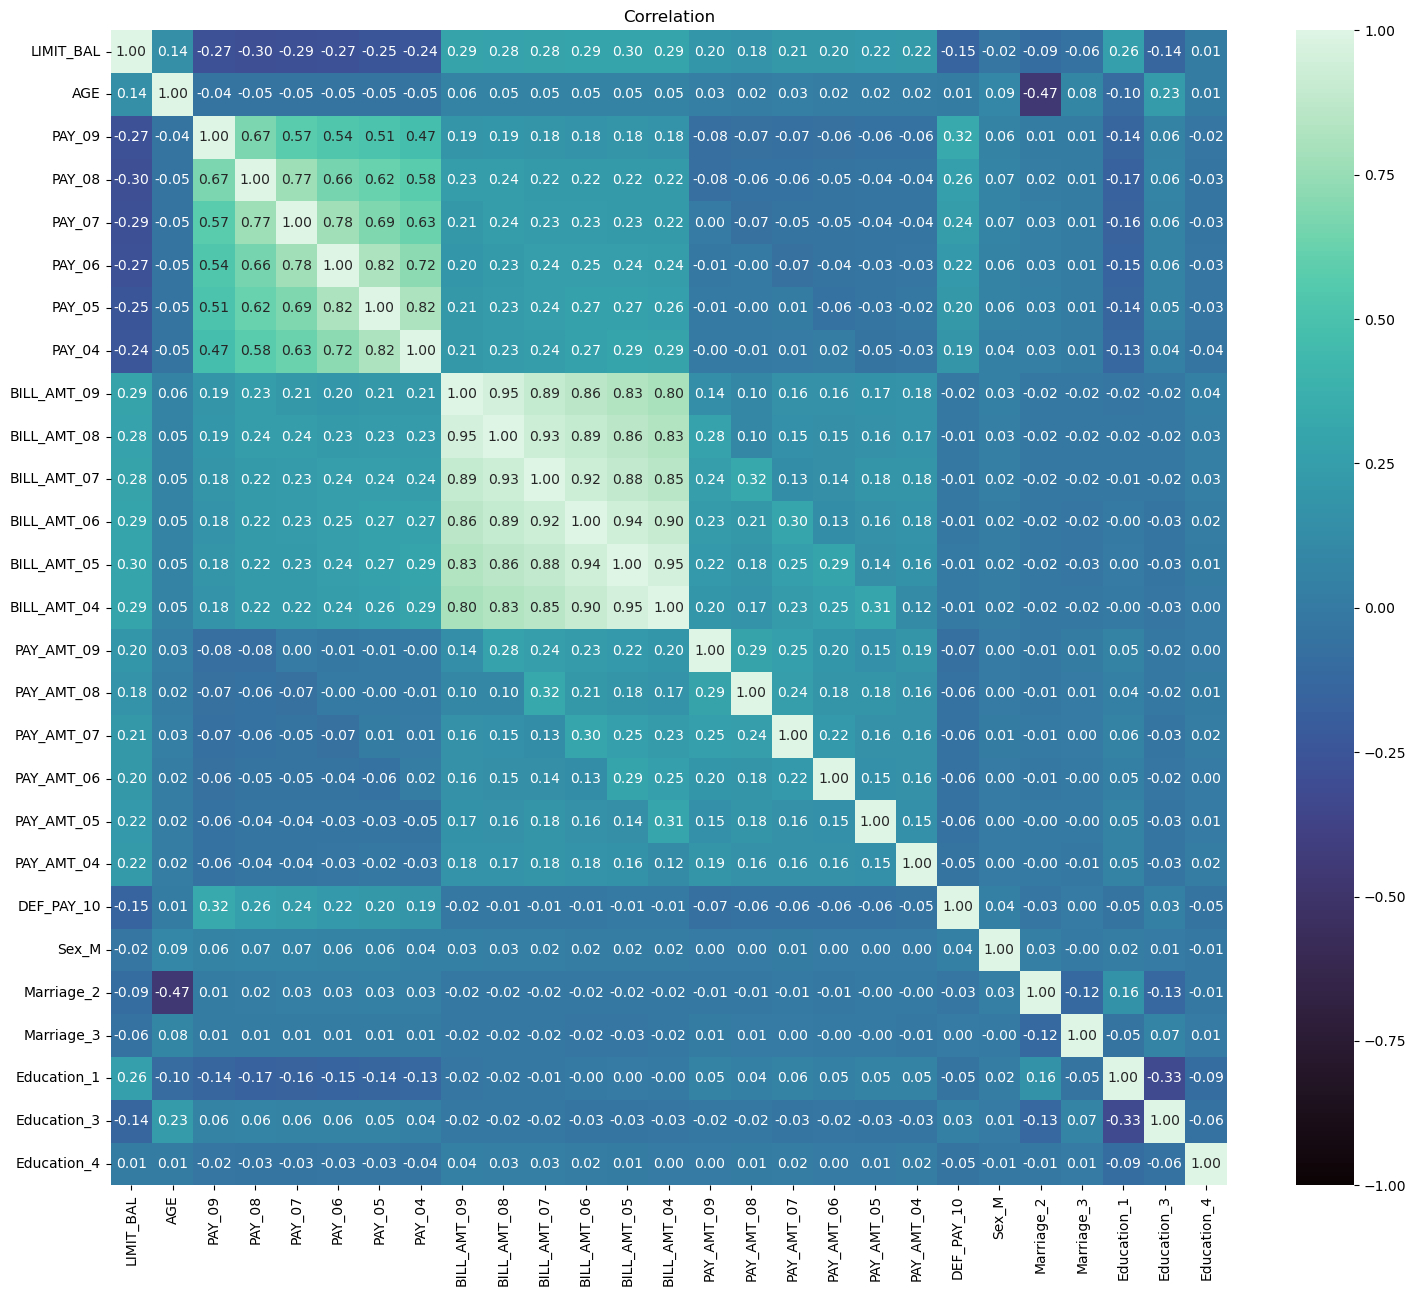

In [39]:
corr= data_final.corr()

#Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap ='mako', fmt='.2f')
plt.title('Correlation')
plt.show()

In [40]:
status

,Marriage_1,Marriage_2,Marriage_3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
29995,1,0,0
29996,0,1,0
29997,0,1,0
29998,1,0,0


In [41]:
#Train and test split
y = data_final['DEF_PAY_10']             #target variable
X = data_final.drop('DEF_PAY_10',axis=1) #features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.20)


In [42]:
#apply cross validation

# Model 1 (with all covariates)

In [71]:
x_ct = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, x_ct)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.465737
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             DEF_PAY_10   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23973
Method:                           MLE   Df Model:                           26
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1213
Time:                        13:52:19   Log-Likelihood:                -11178.
converged:                       True   LL-Null:                       -12720.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3522      0.034    -40.029      0.000      -1.418      -1.286
LIMIT_BAL      -0.0808    

In [72]:
#accuracy with train split
threshold = 0.5
X_val = sm.add_constant(X_test)
y_pred = result.predict(X_val)
y_pred_binary = (y_pred > threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

print(accuracy)


0.8196666666666667


In [77]:
#accuracy with cross validation
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42) 

In [78]:
def fit_logistic_regression(X_train, y_train):
    X_train = sm.add_constant(X_train)  # Add constant term for intercept
    model = sm.Logit(y_train, X_train)
    result = model.fit()
    return result

In [79]:
results = []
accuracies = []
threshold = 0.5

for train_index, val_index in kf.split(data_final):  
    train_data = data_final.iloc[train_index]
    val_data = data_final.iloc[val_index]
    X_train = train_data.drop('DEF_PAY_10', axis=1)  # Assuming 'target_variable' is the name of your target variable
    y_train = train_data['DEF_PAY_10']
    
    X_val = val_data.drop('DEF_PAY_10', axis=1)
    y_val = val_data['DEF_PAY_10']
    
    # Fit logistic regression model
    result = fit_logistic_regression(X_train, y_train)
    
    # Evaluate on validation set
    X_val = sm.add_constant(X_val)  # Add constant term for intercept
    y_pred = result.predict(X_val)
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracy = accuracy_score(y_val, y_pred_binary)
    accuracies.append(accuracy)
    # Store evaluation metrics or results
    results.append({'result': result, 'y_val': y_val, 'y_pred': y_pred})

Optimization terminated successfully.
         Current function value: 0.463929
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464535
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.463932
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464239
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464938
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464250
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.460996
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.463916
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.463028
  

In [76]:
np.mean(accuracies)

0.8105333333333334

# Model 2

In [ ]:
#i'm deleting PAY_04' since its highly correlated with PAY_05 (0.82) and i only keep the one with the largest correlation value against probability of default (PAY_05)
#same for PAY_05

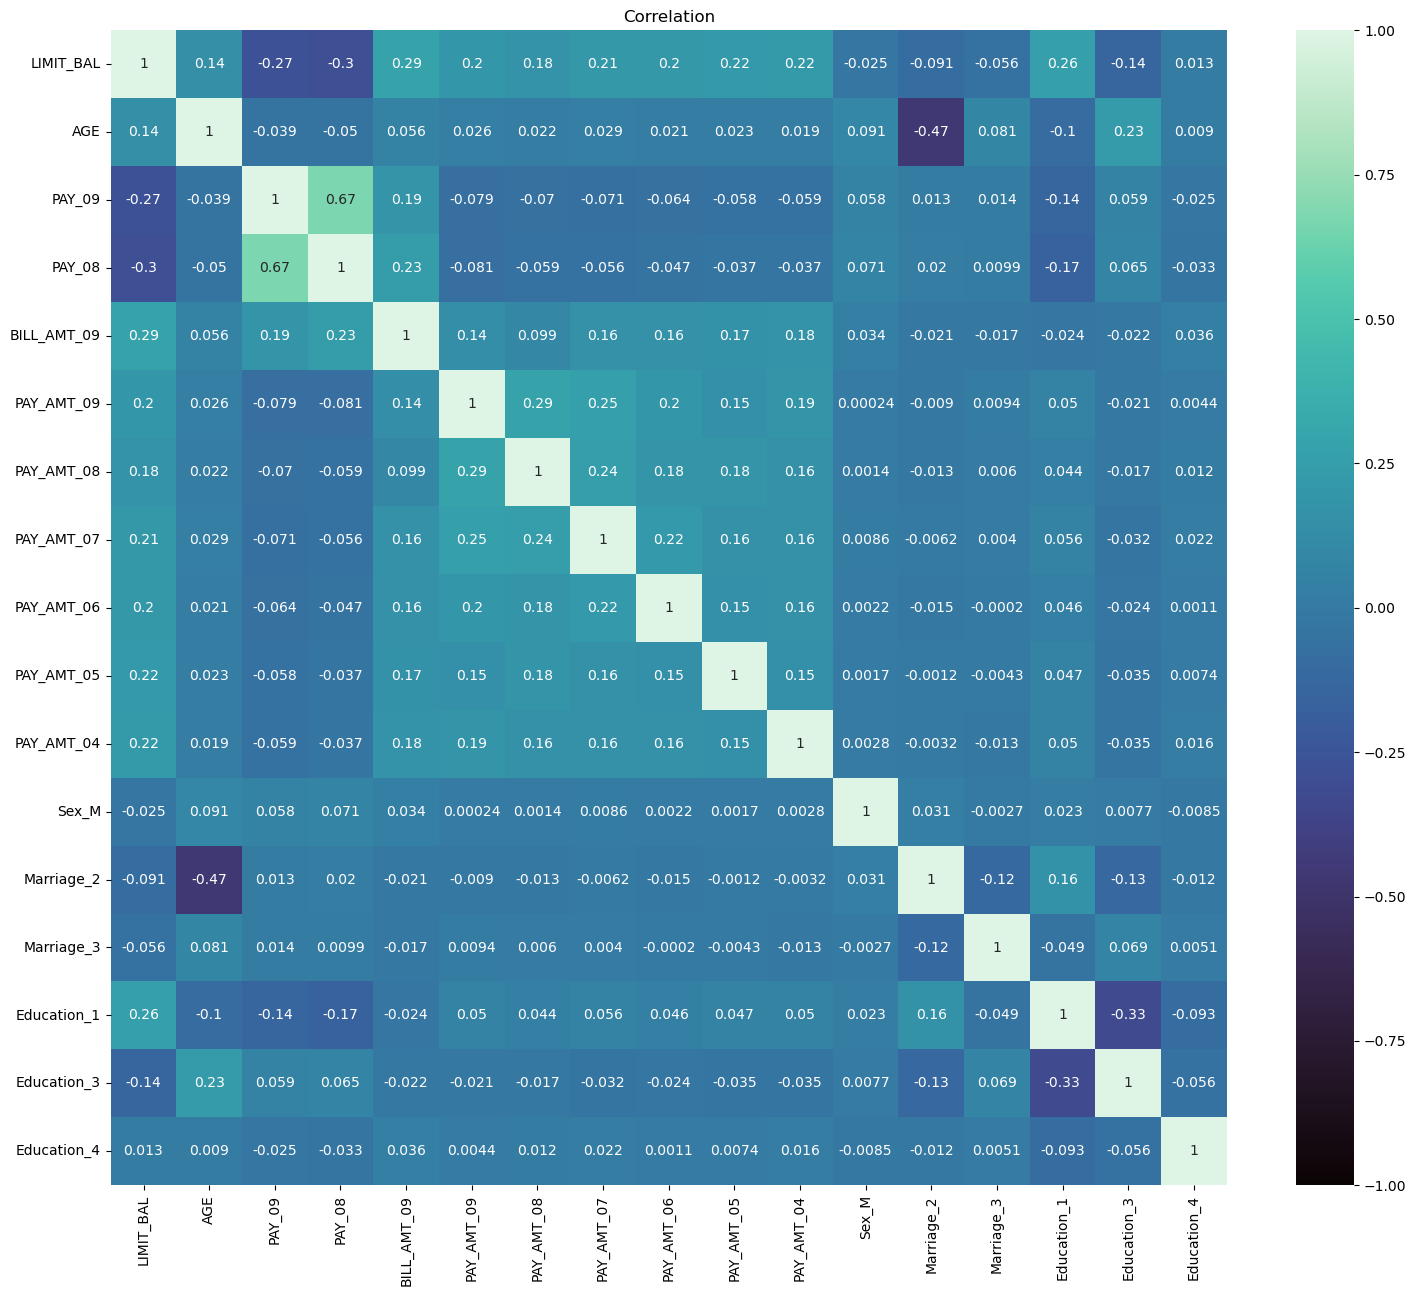

In [80]:
y_2 = data_final['DEF_PAY_10']             #target variable
X_2 = data_final.drop(columns=['DEF_PAY_10','PAY_04','PAY_05','PAY_06','PAY_07','BILL_AMT_04','BILL_AMT_05','BILL_AMT_08',
                               'BILL_AMT_06','BILL_AMT_07','PAY_07'],axis=1) #features

corr= X_2.corr(method='pearson')
#Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap ='mako')
plt.title('Correlation')
plt.show()

In [81]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=0, test_size=.20)

In [82]:
x_ct = sm.add_constant(X_train_2)
logit_model = sm.Logit(y_train_2, x_ct)
result2 = logit_model.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.467496
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             DEF_PAY_10   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23982
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1179
Time:                        13:55:24   Log-Likelihood:                -11220.
converged:                       True   LL-Null:                       -12720.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3562      0.033    -40.685      0.000      -1.422      -1.291
LIMIT_BAL      -0.0978    

In [83]:
#accuracy with train split
X_val_2 = sm.add_constant(X_test_2)
y_pred_2 = result2.predict(X_val_2)
y_pred_binary_2 = (y_pred_2 > threshold).astype(int)
accuracy = accuracy_score(y_test_2, y_pred_binary_2)

print(accuracy)

0.8186666666666667


result.llr_pvalue

# Model 3 

In [84]:
y_3 = data_final['DEF_PAY_10']             #target variable
X_3 = data_final.drop(columns=['DEF_PAY_10','PAY_04','PAY_05','PAY_06','PAY_07','PAY_07','BILL_AMT_04','BILL_AMT_05','BILL_AMT_08',
                               'BILL_AMT_06','BILL_AMT_07','PAY_AMT_05','PAY_AMT_07',
                                'Marriage_3','Education_3'],axis=1) #features

In [85]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=0, test_size=.20)

In [86]:
x_ct = sm.add_constant(X_train_3)
logit_model = sm.Logit(y_train_3, x_ct)
result3 = logit_model.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.467692
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             DEF_PAY_10   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23986
Method:                           MLE   Df Model:                           13
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1176
Time:                        13:56:23   Log-Likelihood:                -11225.
converged:                       True   LL-Null:                       -12720.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3786      0.031    -44.282      0.000      -1.440      -1.318
LIMIT_BAL      -0.0989    

In [87]:
#accuracy with train split
X_val_3 = sm.add_constant(X_test_3)
y_pred_3 = result3.predict(X_val_3)
y_pred_binary_3 = (y_pred_3 > threshold).astype(int)
accuracy = accuracy_score(y_test_3, y_pred_binary_3)

print(accuracy)

0.8185


# Model 4 

In [88]:
y_4 = data_final['DEF_PAY_10']             #target variable
X_4 = data_final.drop(columns=['AGE','DEF_PAY_10','PAY_04','PAY_05','PAY_06','PAY_07','PAY_07','BILL_AMT_04','BILL_AMT_05','BILL_AMT_08',
                               'BILL_AMT_06','BILL_AMT_07','PAY_AMT_05','PAY_AMT_04','PAY_AMT_06','PAY_AMT_07',
                                'Marriage_3','Education_3'],axis=1) #features

In [89]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=0, test_size=.20)

In [90]:
x_ct = sm.add_constant(X_train_4)
logit_model = sm.Logit(y_train_4, x_ct)
result4 = logit_model.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.468212
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             DEF_PAY_10   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23989
Method:                           MLE   Df Model:                           10
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1166
Time:                        13:57:00   Log-Likelihood:                -11237.
converged:                       True   LL-Null:                       -12720.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3528      0.030    -45.182      0.000      -1.411      -1.294
LIMIT_BAL      -0.1092    

In [91]:
#accuracy with train split
X_val_4 = sm.add_constant(X_test_4)
y_pred_4 = result4.predict(X_val_4)
y_pred_binary_4 = (y_pred_4 > threshold).astype(int)
accuracy = accuracy_score(y_test_4, y_pred_binary_4)

print(accuracy)

0.8175


In [ ]:
coefficients = result3.params

In [ ]:
odd_ratios = np.exp(coefficients)
print(odd_ratios)

# Interpretability
For limit_bal,age,bill_amt_09,bill_amt_08,bill_amount_07,pay_amt_09,08,07,05,05,04.. there is no association between then and the independent variables

##### Numerical Variables

pay_09:
    if the payment delay increase by one month, the odds of payment default for October increases by 1.77.

pay_08:
    if the payment delay increase by one month, the odds of payment default for October increases by 1.17.


##### Nominal Variables
#Education_1: Graduate School
#Education_2: University
#Education_3: High School
#Education_4: Others

Education_3:
    the odd( chance to know the default rather than not know it) of an individual studied in High School is 8% less compared to an individual who studied in University.
    


In [ ]:
def oddsratioestimates(y,logit_res):
    freqy=y.value_counts()
    m=len(freqy)
    params = logit_res.params[1:len(logit_res.params)]
    conf = logit_res.conf_int()
    conf=conf.iloc[1:len(logit_res.params)]
    confodr=np.exp(conf)
    odr=np.exp(params.to_frame())
    odr=odr.rename(columns={0:'Point Estimate'})
    confodr=confodr.rename(columns={0:'5%', 1:'95%'})
    table=pd.concat([odr[['Point Estimate']], confodr[['5%','95%']]], axis=1)
    plt.subplot(313)
    plt.title('Odds Ratio Estimates',fontsize=20,y=1.4)
    plt.axis('off')
    plt.axis('tight')
    table.update(table.astype(float))
    table.update(table.applymap('{:,.3f}'.format))
    test=plt.table(cellText=table.values, colLabels=['Point Estimate', 'Lower CI (95% Wald)','Upper CI (95% Wald)'],  
                   rowLabels=table.index, loc='center',cellLoc='center',colWidths=[0.3,0.35,0.35])
    plt.axis('off')
    test.auto_set_font_size(False)
    test.set_fontsize(20) 
    test.scale(2, 1.7)


In [ ]:
#Interpretation
oddsratioestimates(y_train_3,result3)

In [ ]:
data_final

In [ ]:
# lg = LogisticRegression(random_state=0,max_iter=300)
# training = lg.fit(x_train,y_train)
# preds = lg.predict(x_test)
# preds

# coefficients = lg.coef_[0]
# variable_names = x_train.columns

# variable_names
# # variable_contributions = list(zip(x_train.columns, coefficients))
# # variable_contributions.sort(key=lambda x: abs(x[1]), reverse=True)

# # Display variable contributions
# for variable, coefficient in zip(variable_names, coefficients):
#     print(f"{variable}: {coefficient:0.4f}")

In [ ]:
# plt.barh(variable_names, coefficients)
# plt.xlabel('Coefficient Value')
# plt.ylabel('Variable')
# plt.title('Logistic Regression Coefficients')
# plt.show()

In [ ]:
#identifying is the relationship between features and target variables are linear
sns.pairplot(data, x_vars=['PAY_1', 'PAY_2'], y_vars='def_pay', kind='scatter')
plt.show()

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [ ]:
#create the target variables
y = data['def_pay'].copy()
y

In [ ]:
#create the features
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = data[features].copy()
X.columns

In [ ]:
#split into train and test (train 80% of the dataset and test the remaining 20%)
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size =0.20, random_state= 42)

In [ ]:
data.def_pay.describe()

In [ ]:
y_train.describe()

In [ ]:
y_test.describe()

In [ ]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

In [ ]:
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, 
                         scoring= 'accuracy')

In [ ]:
#training
grid_tree.fit(X_train, y_train)

In [ ]:
print(grid_tree.best_estimator_)

In [ ]:
print(np.abs(grid_tree.best_score_))

In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
from sklearn.model_selection import KFold


In [ ]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

# for i,(train_index, test_index) in enumerate(kf.split(df)):
#     training = df.iloc[train_index,:]
#     valid = df.iloc[test_index,:]
#     feats = training[features] #defined above
#     label = training['def_pay']
#     valid_feats = valid[features]
#     valid_label = valid['def_pay']
#     classifier.fit(feats,label) #it is the last one we run, the best one
#     pred = classifier.predict(valid_feats)
#     score = accuracy_score(y_true = valid_label, y_pred = pred)
#     fold.append(i+1)
#     scr.append(score)

kf.split(data)